In [1]:
import geopandas as gpd
import osmnx as ox
import numpy as np
import networkx as nx
import pandas as pd
import pyrosm
import matplotlib.pyplot as plt
import contextily as cx 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
ox.__version__

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


'1.1.2'

In [2]:
# turn response caching off
ox.settings.use_cache=False  # If you are working on a project where you often re-download data, turning it off is recommended!

# turn it back on and turn on/off logging to your console
ox.settings.use_cache=True
ox.settings.log_console=False

In [3]:
gdf = ox.geometries_from_place("Copenhagen Municipality", tags = {"building": True})
gdf_proj = ox.project_gdf(gdf, to_crs="EPSG:25832")
fig, ax = ox.plot_footprints(gdf_proj, filepath="files/cph_buildings.png", dpi=400, save=True, show=False, close=True)

/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/opt/conda/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


### Localising potential pubcrawl locations with the tags 'pub' and 'bar'
- 103 pubs 
- 452 bars

In [16]:
tags = {'amenity': ['pub', 'bar']}
pubs = ox.geometries_from_place(["Copenhagen Municipality"], tags=tags)

/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/opt/conda/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/opt/conda/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


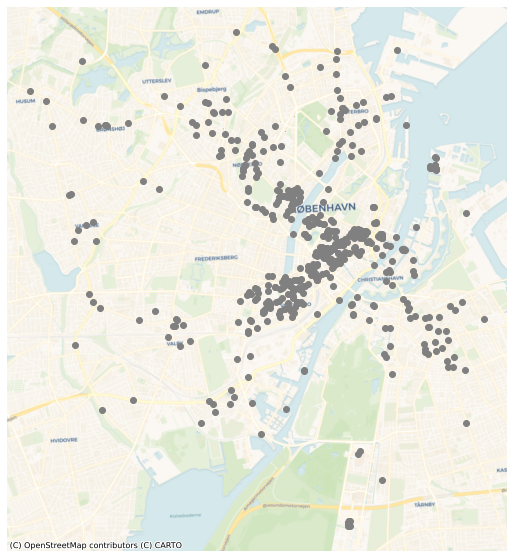

In [21]:
fig, ax = plt.subplots(figsize=(10,10))

pubs.to_crs("EPSG:25832").plot(ax=ax, color='grey')
ax.set_axis_off()
cx.add_basemap(
    ax=ax, 
    crs="EPSG:25832", 
    source=cx.providers.CartoDB.Voyager);

In [18]:
pubs.length

/tmp/ipykernel_3192/2177974567.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pubs.length


element_type  osmid    
node          24958713     0.000000
              25440922     0.000000
              25869217     0.000000
              25904721     0.000000
              26053041     0.000000
                             ...   
way           88728055     0.000684
              147291402    0.000722
              187638708    0.000861
              324488860    0.000538
              625035646    0.000437
Length: 554, dtype: float64

In [22]:
#only 195 pubsbars with available opening hours 
pubs[ pubs["opening_hours"].notna() ==True]

amenity  fvst:name fvst:navnelbnr  \
element_type osmid                                           
node         24958713        pub  Cerevisia         111614   
             25440922        pub        NaN        1253893   
             25869217        bar        NaN         501959   
             25904721        pub        NaN        1256497   
             279472194       bar        NaN         795821   
...                          ...        ...            ...   
             10055230052     bar        NaN         714366   
             10064097280     pub        NaN            NaN   
             10691958839     bar        NaN            NaN   
way          187638708       pub        NaN         552309   
             324488860       bar        NaN         516689   

                                          name  \
element_type osmid                               
node         24958713                  Ølbaren   
             25440922                 Bankeråt   
             25869217               Black Swan   
             25904721              Café Viking   
             279472194                Drop Inn   
...                                        ...   
             10055230052                   NaN   
             10064097280                    ØB   
             10691958839  Hos Rune Bottle shop   
way          187638708             Lygtens Kro   
             324488860                  Lidkøb   

                                                              opening_hours  \
element_type osmid                                                            
node         24958713     Mo 21:00-01:00, Tu-We 16:00-01:00, Th 16:00-02...   
             25440922                   Mo-Fr 09:30-24:00;Sa-Su 10:30-24:00   
             25869217     Mo-We 15:00-01:00, Th-Sa 15:00-02:00, Su 15:00...   
             25904721                     Mo-Sa 09:00-02:00, Su 09:00-20:00   
             279472194    Mo,Tu 14:00-24:00, We,Th 14:00-02:00, Fr,Sa 14...   
...                                                                     ...   
             10055230052               We,Th,Sa 18:00-02:00; Fr 16:00-02:00   
             10064097280  Mo-Th 16:00-24:00, Fr 14:00-01:00, Sa 12:00-01...   
             10691958839  Tu 13:00-18:00; We,Th 13:00-19:00; Fr,Sa 12:00...   
way          187638708                               12:00-02:00; Su-Mo off   
             324488860                          16:00-02:00; Su 20:00-02:00   

                                    phone ref:DK:cvr  smoking  \
element_type osmid                                              
node         24958713        +45 35354534   26748097       no   
             25440922     +45 33 93 69 88   41544988       no   
             25869217                 NaN   33947178  outside   
             25904721        +45 35831493   41351187      NaN   
             279472194       +45 33112404   38578553      NaN   
...                                   ...        ...      ...   
             10055230052  +45 31 73 73 64   38631578      NaN   
             10064097280              NaN        NaN  outside   
             10691958839              NaN        NaN  outside   
way          187638708       +45 26369086   34516448      NaN   
             324488860       +45 33112010   33955820      NaN   

                                              website  \
element_type osmid                                      
node         24958713             http://oelbaren.dk/   
             25440922         http://www.bankeraat.dk   
             25869217     http://www.blackswanbar.dk/   
             25904721        http://www.cafeviking.dk   
             279472194           https://drop-inn.dk/   
...                                               ...   
             10055230052          http://www.bar7.dk/   
             10064097280                          NaN   
             10691958839                          NaN   
way          187638708    https://www.lygtens-kro.dk/   
         